In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df_cmp = pd.read_csv('data/Device_Compaction_Frequency_2023-01-04_1019.csv')

In [3]:

# Sorting 
df_cmp = df_cmp.sort_values(by='Total Compactions', ascending=False)
df_cmp

,Site,Total Compactions,12 AM - 6 AM,6 AM - 12 PM,12 PM - 6 PM,6 PM - 12 AM
13,BU #82 Warren Towers 35,27428,2220,10235,8531,6442
8,BU #43 West Loading Dock,22844,742,9069,7266,5767
16,BU #93 George Sherman Union,22571,229,5746,11617,4979
14,BU #87 College of Engineering,15142,1450,4991,5616,3085
6,BU #38 Life Sciences,13205,2047,2699,5065,3394
4,BU #2 Student Village,13196,135,4130,5025,3906
10,BU #48 Student Village #2,9800,8,1782,4031,3979
12,BU #72 Rafik B Hariri,8685,979,1881,2788,3037
3,BU #18 - Warren Hall,8437,20,3043,3589,1785
18,BU 140 Bay State Rd,8392,181,4441,2732,1038


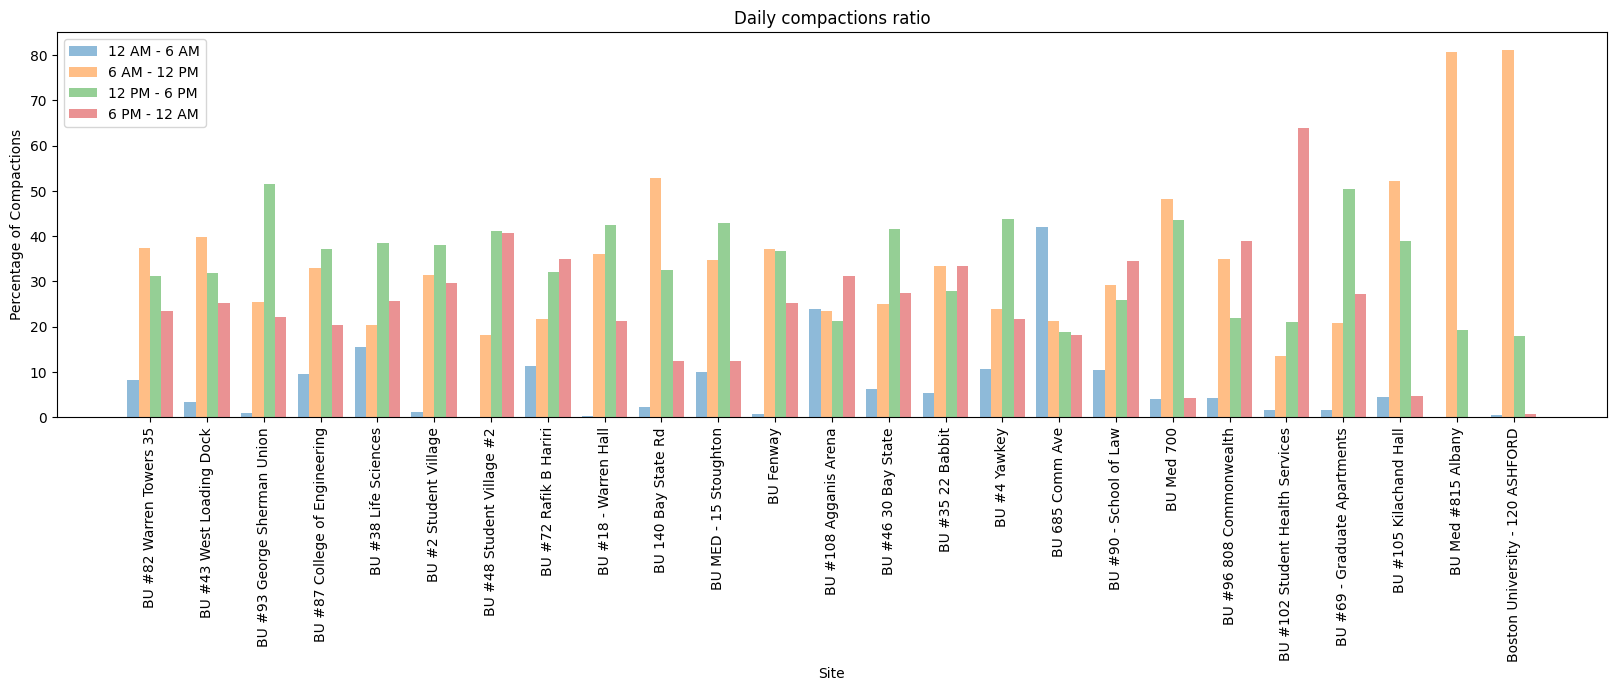

In [4]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(20, 5))

# Define the positions of the bars for each site
x = range(len(df_cmp['Site']))
bar_width = 0.2

# Create the four bars for each site
plt.bar(x, df_cmp['12 AM - 6 AM']/df_cmp['Total Compactions']*100, width=bar_width, alpha=0.5, label='12 AM - 6 AM')
plt.bar([i + bar_width for i in x], df_cmp['6 AM - 12 PM']/df_cmp['Total Compactions']*100, width=bar_width, alpha=0.5, label='6 AM - 12 PM')
plt.bar([i + bar_width*2 for i in x], df_cmp['12 PM - 6 PM']/df_cmp['Total Compactions']*100, width=bar_width, alpha=0.5, label='12 PM - 6 PM')
plt.bar([i + bar_width*3 for i in x], df_cmp['6 PM - 12 AM']/df_cmp['Total Compactions']*100, width=bar_width, alpha=0.5, label='6 PM - 12 AM')

# Set the x-axis tick labels and rotation
plt.xticks([i + bar_width*1.5 for i in x], df_cmp['Site'], rotation=90)

# Set the chart title and axis labels
plt.title('Daily compactions ratio')
plt.xlabel('Site')
plt.ylabel('Percentage of Compactions')

# Show the chart
plt.legend()
plt.show()


In [60]:
# Check for grbage pickups
import pandas as pd
import matplotlib.pyplot as plt
df_readings = pd.read_csv('data/PSI_Readings_with_Weather_2023-01-04_1026.csv')

df_readings.head()


,Account,Site,Device,Serial No.,Reading,Reading Date,Pressure,Wind Speed,Celsius,Fahrenheit
0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,168,2023-01-04T04:22:06,1009.0,2.28,NaN,NaN
1,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,328,2023-01-04T04:21:53,1009.0,2.28,NaN,NaN
2,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,208,2023-01-04T04:21:23,1009.0,2.28,NaN,NaN
3,Boston University,BU 685 Comm Ave,BU 685 Comm Ave,31164,720,2023-01-04T04:00:41,1009.0,2.30,NaN,NaN
4,Boston University,BU #87 College of Engineering,BU #87 College of Engineering 20 Yd,31168,600,2023-01-04T03:01:46,1009.0,2.31,NaN,NaN


In [72]:
df_group = df_readings.loc[df_readings['Serial No.'] == 31180]

df_group = df_group.reset_index()
df_group = df_group.sort_values(by='Reading Date')

In [73]:

# create a new empty dataframe to store the copied values
df_new = pd.DataFrame(columns=['Reading Date', 'Reading'])

# iterate over the rows of the original dataframe
for i in range(1, len(df_group)-1):
    # calculate the percentage change between the current and previous rows
    pct_change = (df_group.loc[i, 'Reading'] - df_group.loc[i-1, 'Reading']) / df_group.loc[i-1, 'Reading']
    # check if the percentage change is less than -0.4 (i.e., a drop of more than 40%)
    if pct_change < -0.4:
        # copy the values of the current row to the new dataframe
        df_new = df_new.append(df_group.loc[i], ignore_index=True)

# print the new dataframe
df_new



/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/1400410714.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(df_group.loc[i], ignore_index=True)
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/1400410714.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(df_group.loc[i], ignore_index=True)
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/1400410714.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(df_group.loc[i], ignore_index=True)
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/1400410714.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

,Reading Date,Reading,index,Account,Site,Device,Serial No.,Pressure,Wind Speed,Celsius,Fahrenheit
0,2023-01-03T16:40:02,224,78.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1015.2,2.47,NaN,NaN
1,2023-01-03T12:19:20,216,163.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1020.8,1.57,NaN,NaN
2,2023-01-03T08:28:15,200,195.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1020.8,1.57,NaN,NaN
3,2023-01-03T08:01:45,232,207.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1020.8,1.57,NaN,NaN
4,2023-01-02T10:23:26,192,336.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1017.7,2.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2383,2022-05-01T10:48:39,160,99874.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1020.3,3.83,NaN,NaN
2384,2022-05-01T10:13:21,168,99903.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1020.3,3.83,NaN,NaN
2385,2022-05-01T09:44:46,168,99917.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1020.3,3.83,NaN,NaN
2386,2022-05-01T09:20:47,176,99930.0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180.0,1020.3,3.83,NaN,NaN


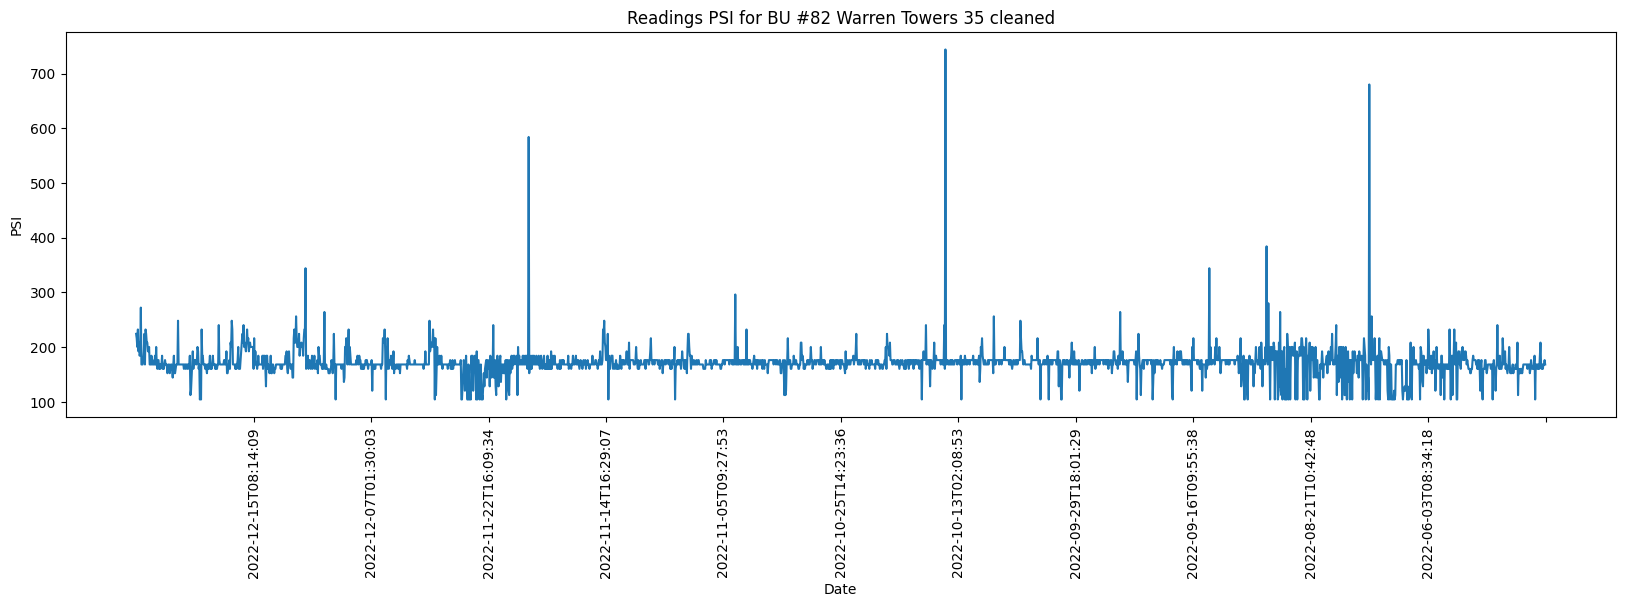

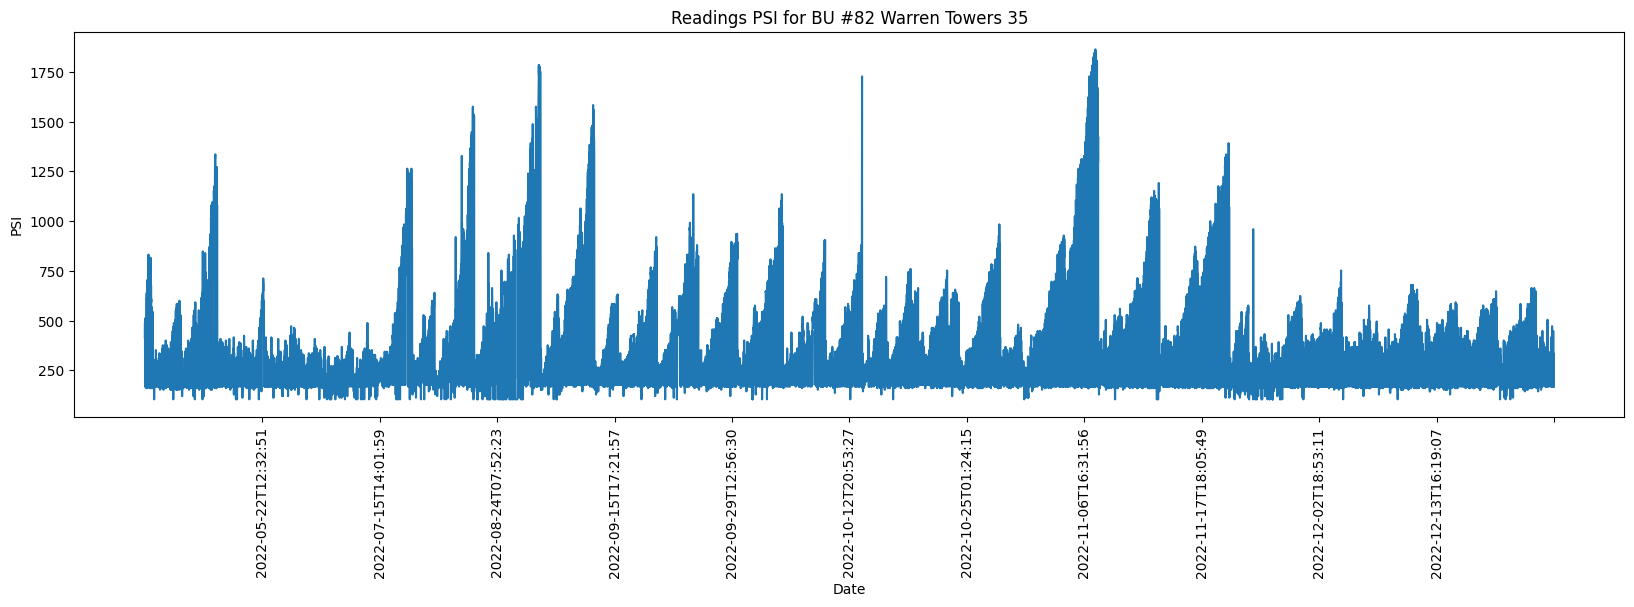

In [74]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(df_new['Reading Date'], df_new['Reading'])
longevity = len(df_new['Reading Date'])/ 12
months = []
for i in range(1,13):
    months.append(i*longevity)
plt.xticks(months, rotation='vertical')
plt.title("Readings PSI for BU #82 Warren Towers 35 cleaned")
plt.xlabel("Date")
plt.ylabel("PSI")

plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(df_group['Reading Date'], df_group['Reading'])
longevity = len(df_group['Reading Date'])/ 12
months = []
for i in range(1,13):
    months.append(i*longevity)
plt.xticks(months, rotation='vertical')
plt.title("Readings PSI for BU #82 Warren Towers 35")
plt.xlabel("Date")
plt.ylabel("PSI")



plt.show()

Number of peaks: 4605


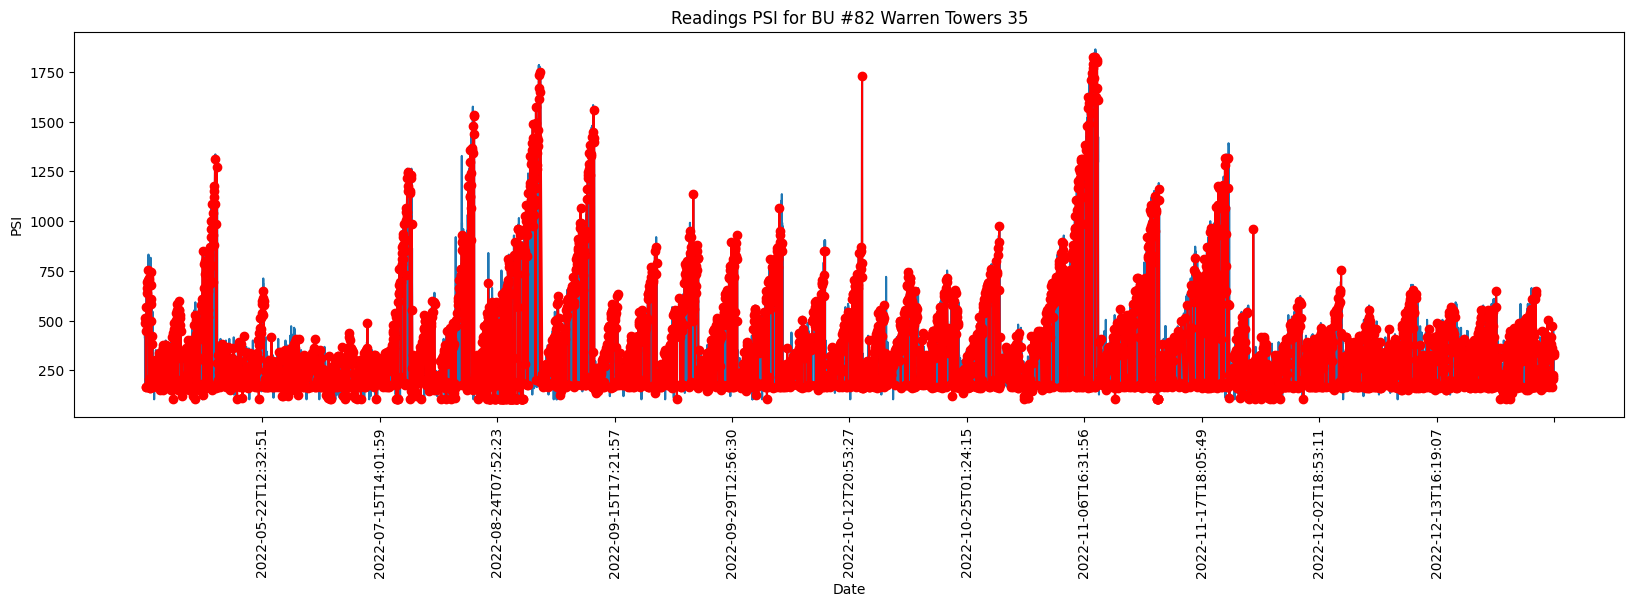

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# assuming you have a DataFrame called df_group with 'Reading Date' and 'Reading' columns
# plotting the original data
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(df_group['Reading Date'], df_group['Reading'])

longevity = len(df_group['Reading Date']) / 12
months = []
for i in range(1, 13):
    months.append(i * longevity)
plt.xticks(months, rotation='vertical')

plt.title("Readings PSI for BU #82 Warren Towers 35")
plt.xlabel("Date")
plt.ylabel("PSI")

# finding the peaks and plotting a red line on top of the original plot
peaks, _ = find_peaks(df_group['Reading'])
plt.plot(df_group['Reading Date'][peaks], df_group['Reading'][peaks], 'r', marker='o', linestyle='-')

# count the number of peaks
num_peaks = len(peaks)
print("Number of peaks:", num_peaks)

plt.show()


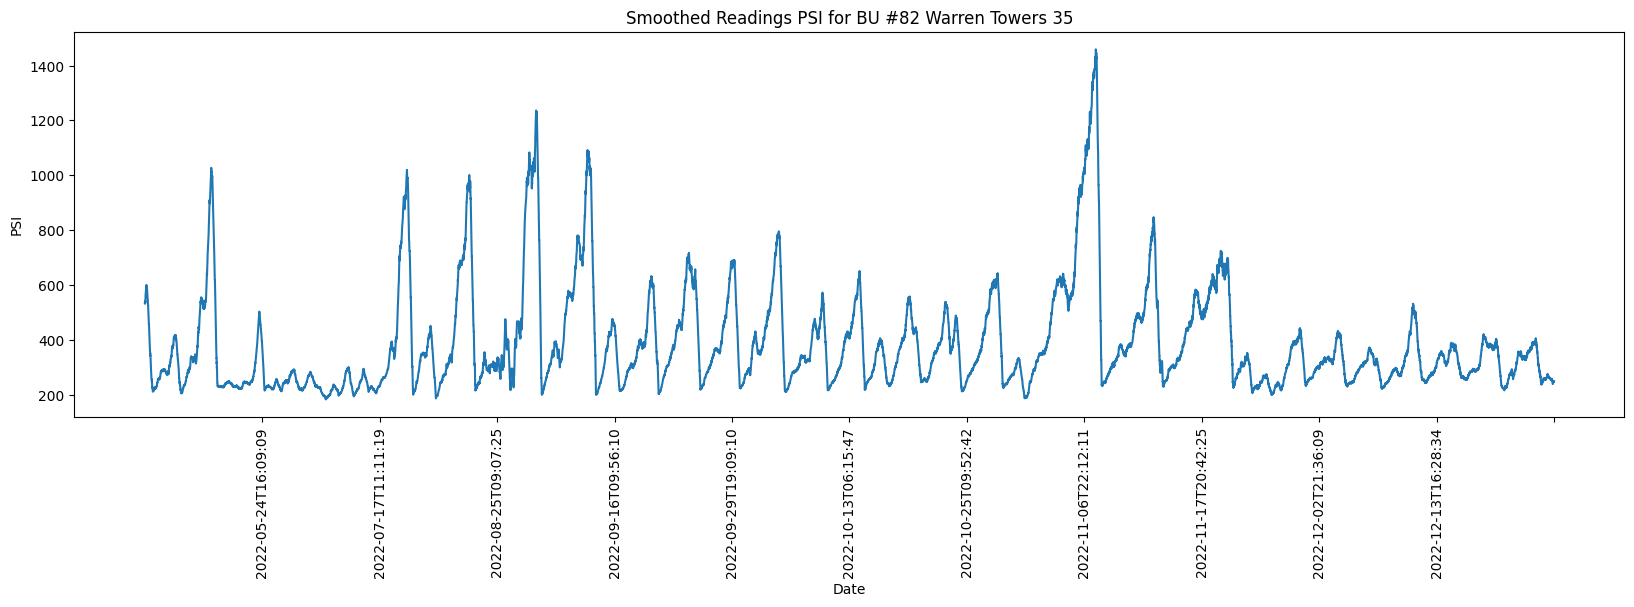

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Your previous code for data processing goes here

def moving_average(data, window_size):
    """
    Calculate the moving average of the given data using a specified window size.
    :param data: Array-like data to be smoothed
    :param window_size: Size of the moving average window
    :return: Smoothed data
    """
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

# Apply the moving average to the data
window_size = 50  # Adjust this value to change the smoothing factor
smoothed_reading = moving_average(df_group['Reading'], window_size)

# Adjust the x-axis data (Reading Date) for the smoothed data
smoothed_dates = df_group['Reading Date'][window_size - 1:]

# Create the plot
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(smoothed_dates, smoothed_reading)

longevity = len(smoothed_dates) / 12
months = []
for i in range(1, 13):
    months.append(i * longevity)
plt.xticks(months, rotation='vertical')

plt.title("Smoothed Readings PSI for BU #82 Warren Towers 35")
plt.xlabel("Date")
plt.ylabel("PSI")
plt.show()


Number of compactions: 130
Number of pickups: 24


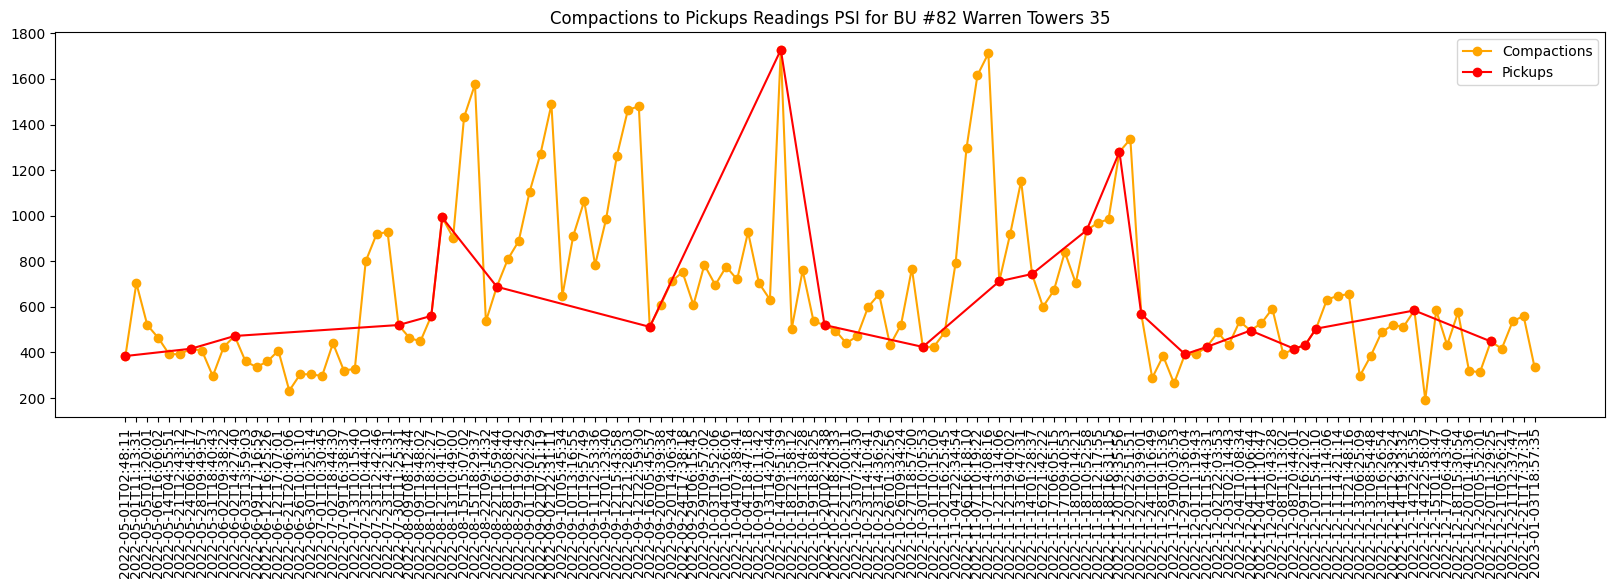

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks_cwt

# Your previous code for data processing and plotting goes here

# Calculate peaks using the find_peaks_cwt function
# min_drop = 10  # Adjust this value to control the minimum drop for a peak
prominences = df_group['Reading'].values
peaks = find_peaks_cwt(prominences, np.arange(1, 10))

# Calculate the prominences of the peaks
peak_prominences = np.array([prominences[peak] - prominences[peak - 1] for peak in peaks])

# Define thresholds for categorizing peaks into compactions and pickups
compaction_threshold = 30  # Adjust this value based on your data
pickup_threshold = 200      # Adjust this value based on your data

# Categorize peaks into compactions and pickups
compaction_peaks = peaks[peak_prominences >= compaction_threshold]
pickup_peaks = peaks[peak_prominences >= pickup_threshold]

# Highlight compactions (small peaks) on the plot
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(df_group['Reading Date'].iloc[compaction_peaks], df_group['Reading'].iloc[compaction_peaks], marker='o', color='orange', label='Compactions')

# Highlight pickups (huge peaks) on the plot
plt.plot(df_group['Reading Date'].iloc[pickup_peaks], df_group['Reading'].iloc[pickup_peaks], marker='o', color='red', label='Pickups')

plt.legend()

# Count the number of compactions and pickups
num_compactions = len(compaction_peaks)
num_pickups = len(pickup_peaks)

print("Number of compactions:", num_compactions)
print("Number of pickups:", num_pickups)
plt.xticks(rotation='vertical')

plt.title("Compactions to Pickups Readings PSI for BU #82 Warren Towers 35")
plt.show()


Number of peaks: 4398


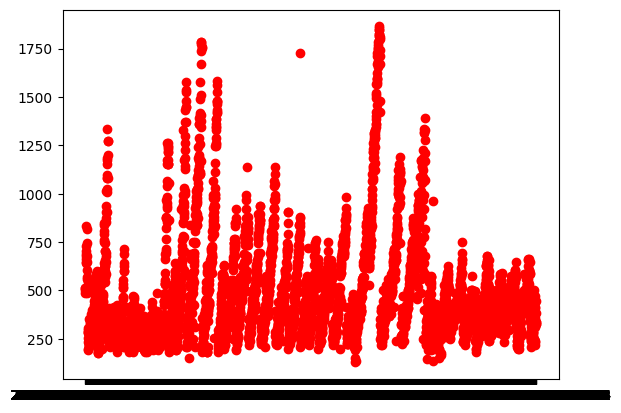

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Your previous code for data processing and plotting goes here

# Calculate peaks using the find_peaks function
# Here, I assume 'Reading' column is numeric. If not, convert it to a numeric type
min_drop = 10  # Adjust this value to control the minimum drop for a peak
prominences = df_group['Reading'].values
peaks, _ = find_peaks(prominences, prominence=(min_drop, None))

# Highlight peaks on the plot
plt.scatter(df_group['Reading Date'].iloc[peaks], df_group['Reading'].iloc[peaks], marker='o', color='red')

# Count the number of peaks
num_peaks = len(peaks)
print("Number of peaks:", num_peaks)

plt.show()


In [9]:
# convert date column to datetime
df_group['Reading Date'] = pd.to_datetime(df_group['Reading Date'])

# filter for October
october_data = df_group[df_group['Reading Date'].dt.month == 10]
october_data

,index,Account,Site,Device,Serial No.,Reading,Reading Date,Pressure,Wind Speed,Celsius,Fahrenheit
5092,28809,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,128,2022-10-31 23:15:20,1015.8,5.35,NaN,NaN
5093,28812,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,136,2022-10-31 23:03:04,1015.8,5.35,NaN,NaN
5094,28813,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,112,2022-10-31 23:02:31,1015.8,5.35,NaN,NaN
5095,28863,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,320,2022-10-31 20:37:36,1015.8,5.35,NaN,NaN
5096,28865,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,176,2022-10-31 20:36:43,1015.8,5.35,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7846,45489,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,272,2022-10-01 01:56:41,1024.3,2.80,NaN,NaN
7847,45490,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,200,2022-10-01 01:56:00,1024.3,2.80,NaN,NaN
7848,45494,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,176,2022-10-01 01:19:43,1024.3,2.80,NaN,NaN
7849,45495,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,344,2022-10-01 01:19:31,1024.3,2.80,NaN,NaN


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '2022-10-30'),
  Text(1, 0, '2022-10-29'),
  Text(2, 0, '2022-10-28'),
  Text(3, 0, '2022-10-27'),
  Text(4, 0, '2022-10-26'),
  Text(5, 0, '2022-10-25'),
  Text(6, 0, '2022-10-24'),
  Text(7, 0, '2022-10-23'),
  Text(8, 0, '2022-10-22'),
  Text(9, 0, '2022-10-21'),
  Text(10, 0, '2022-10-20'),
  Text(11, 0, '2022-10-19'),
  Text(12, 0, '2022-10-18'),
  Text(13, 0, '2022-10-17'),
  Text(14, 0, '2022-10-16'),
  Text(15, 0, '2022-10-15'),
  Text(16, 0, '2022-10-14'),
  Text(17, 0, '2022-10-13'),
  Text(18, 0, '2022-10-12'),
  Text(19, 0, '2022-10-11'),
  Text(20, 0, '2022-10-10'),
  Text(21, 0, '2022-10-09'),
  Text(22, 0, '2022-10-08'),
  Text(23, 0, '2022-10-07'),
  Text(24, 0, '2022-10-06'),
  Text(25, 0, '2022-10-05'),
  Text(26, 0, '2022-10-04'),
  Text(27, 0, '2022-10-03'),
  Text(28, 0, '2022-10-02')

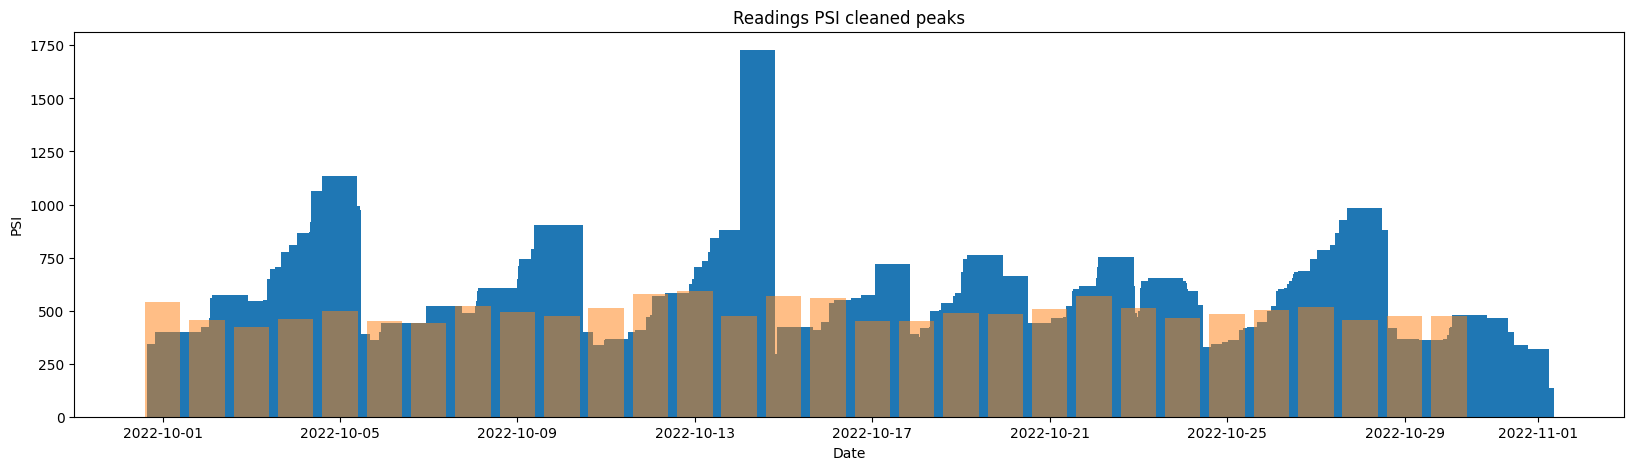

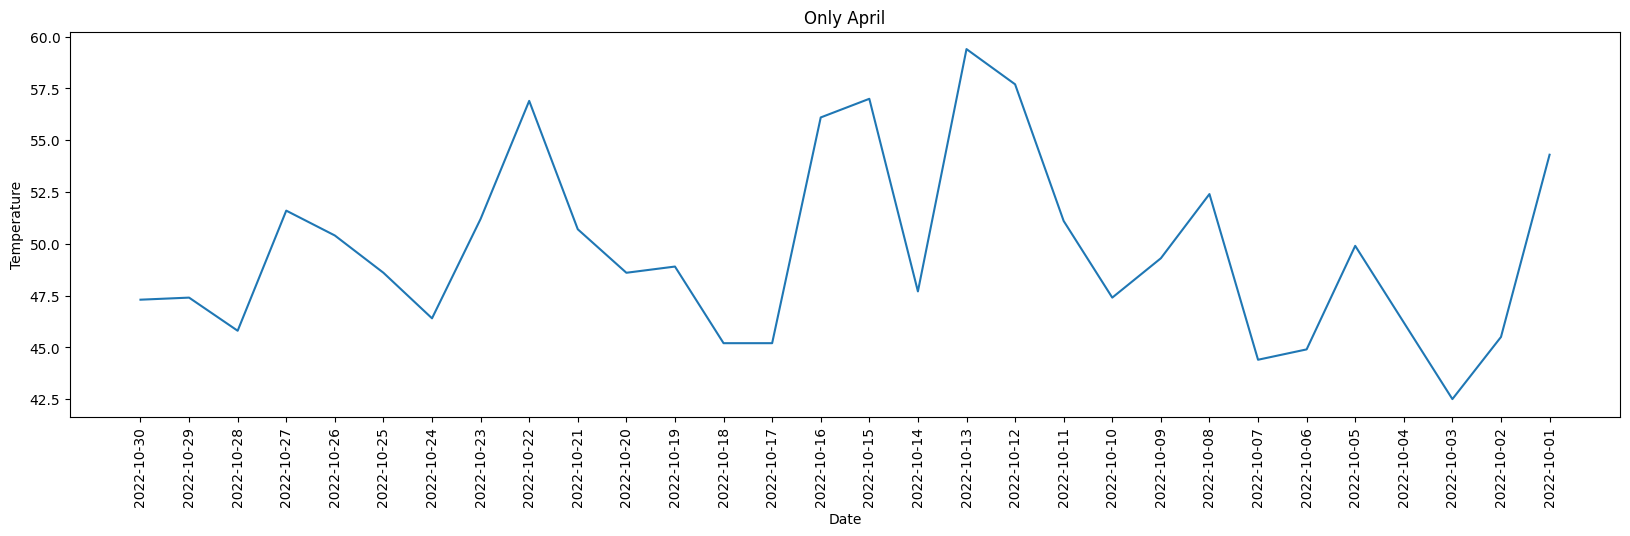

In [10]:
weather_apr = pd.read_csv('data/April_weather.csv')
df_cmp = pd.read_csv('data/Device_Compaction_Frequency_2023-01-04_1019.csv')
weather_apr = weather_apr.sort_values(by='April', ascending=False)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.bar(october_data['Reading Date'], october_data['Reading'])
plt.bar(weather_apr['April'], weather_apr['Avg']*10, alpha=0.5)
plt.title("Readings PSI cleaned peaks")
plt.xlabel("Date")
plt.ylabel("PSI")
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(weather_apr['April'], weather_apr['Avg'])
plt.title("Only April")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.xticks(rotation=90)
# longevity = len(october_data['Reading Date'])/ 30
# months = []
# for i in range(1,31):
#     months.append(i*longevity)
# plt.xticks(months, rotation='vertical')

# plt.show()

In [11]:

# assuming your data is in a dataframe called df with columns 'date' and 'value'
window_size = 50
october_data['moving_average'] = october_data['Reading'].rolling(window_size).mean()
october_data.head(20)

/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_40094/2595624288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_data['moving_average'] = october_data['Reading'].rolling(window_size).mean()


,index,Account,Site,Device,Serial No.,Reading,Reading Date,Pressure,Wind Speed,Celsius,Fahrenheit,moving_average
5092,28809,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,128,2022-10-31 23:15:20,1015.8,5.35,NaN,NaN,NaN
5093,28812,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,136,2022-10-31 23:03:04,1015.8,5.35,NaN,NaN,NaN
5094,28813,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,112,2022-10-31 23:02:31,1015.8,5.35,NaN,NaN,NaN
5095,28863,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,320,2022-10-31 20:37:36,1015.8,5.35,NaN,NaN,NaN
5096,28865,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,176,2022-10-31 20:36:43,1015.8,5.35,NaN,NaN,NaN
5097,28887,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,232,2022-10-31 19:25:35,1016.1,6.96,NaN,NaN,NaN
5098,28888,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,216,2022-10-31 19:23:06,1016.1,6.96,NaN,NaN,NaN
5099,28918,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,248,2022-10-31 18:34:21,1016.1,6.96,NaN,NaN,NaN
5100,28920,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,208,2022-10-31 18:34:08,1016.1,6.96,NaN,NaN,NaN
5101,28940,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,168,2022-10-31 18:04:16,1016.1,6.96,NaN,NaN,NaN


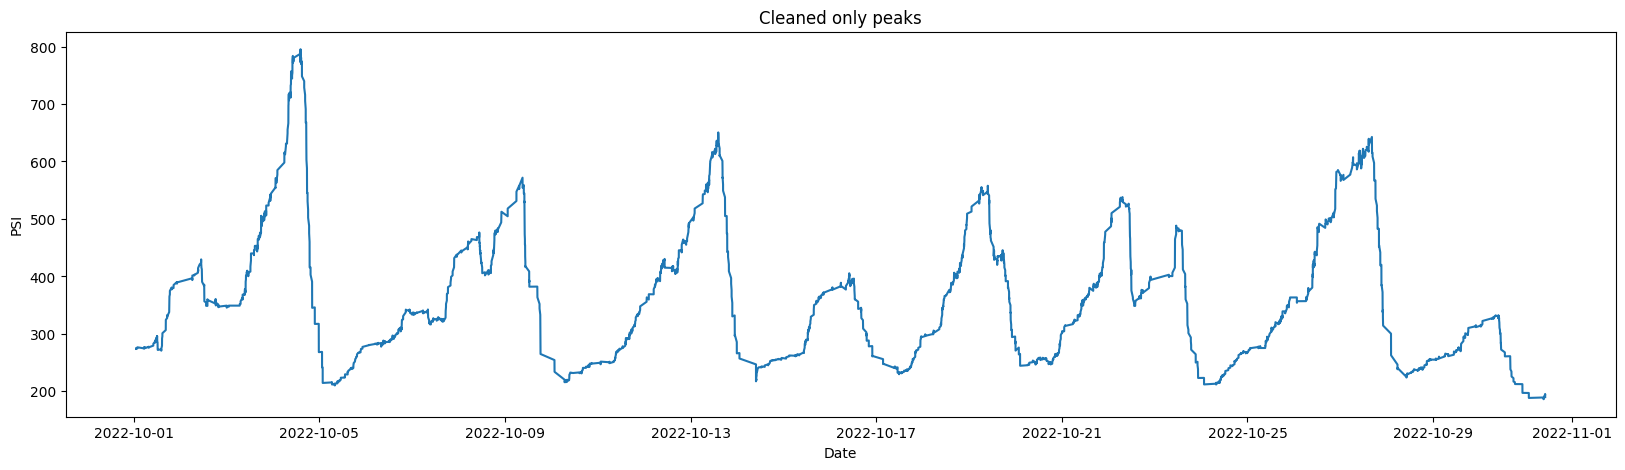

In [12]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(october_data['Reading Date'],october_data['moving_average'] )
plt.title("Cleaned only peaks")
plt.xlabel("Date")
plt.ylabel("PSI")
plt.show()

In [13]:
from scipy.signal import find_peaks

# assume your smoothed data is in the variable 'smoothed_data'
# set a threshold for the minimum peak height
peak_threshold = 500

# find the peaks in the smoothed data that are higher than the threshold
peaks, _ = find_peaks(october_data['moving_average'], height=peak_threshold)

# count the number of peaks
num_drastic_peaks = len(peaks)

print(f"Number of drastic peaks: {num_drastic_peaks}")


Number of drastic peaks: 84


Compare pickups to season


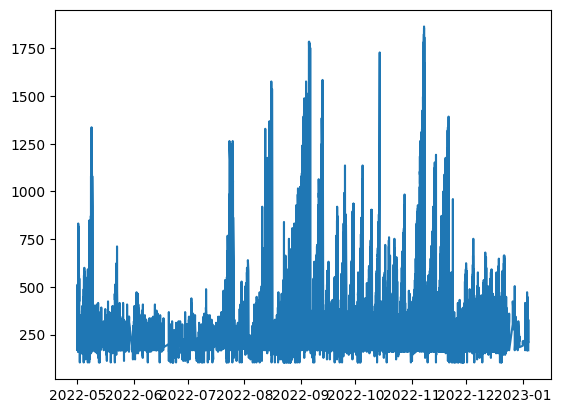

In [36]:
plt.plot(df_group['Reading Date'],df_group['Reading'])

Peaks:
x: 2022-12-11 12:30:41, y: 680
x: 2022-12-11 12:07:11, y: 680
x: 2022-11-30 11:16:20, y: 520
x: 2022-11-21 10:56:27, y: 288
x: 2022-11-13 10:38:25, y: 1120
x: 2022-11-07 22:28:47, y: 1808
x: 2022-11-07 09:47:14, y: 1520
x: 2022-11-06 16:34:44, y: 1328
x: 2022-11-06 16:19:12, y: 1328
x: 2022-11-04 10:14:36, y: 912
x: 2022-11-03 21:53:53, y: 848
x: 2022-11-03 13:30:01, y: 696
x: 2022-11-03 13:08:26, y: 696
x: 2022-10-27 12:14:41, y: 720
x: 2022-10-27 10:07:43, y: 784
x: 2022-10-23 15:59:25, y: 640
x: 2022-10-22 17:01:23, y: 448
x: 2022-10-22 16:45:51, y: 448
x: 2022-10-22 16:08:38, y: 448
x: 2022-10-22 11:19:57, y: 640
x: 2022-10-22 11:06:44, y: 640
x: 2022-10-22 10:53:01, y: 640
x: 2022-10-18 18:53:25, y: 464
x: 2022-10-16 10:16:01, y: 536
x: 2022-10-08 12:17:51, y: 608
x: 2022-10-06 14:00:24, y: 336
x: 2022-10-06 10:04:24, y: 328
x: 2022-10-06 09:20:41, y: 328
x: 2022-10-04 16:43:15, y: 872
x: 2022-10-04 10:13:00, y: 864
x: 2022-10-02 11:20:51, y: 560
x: 2022-09-29 16:37:27, y: 

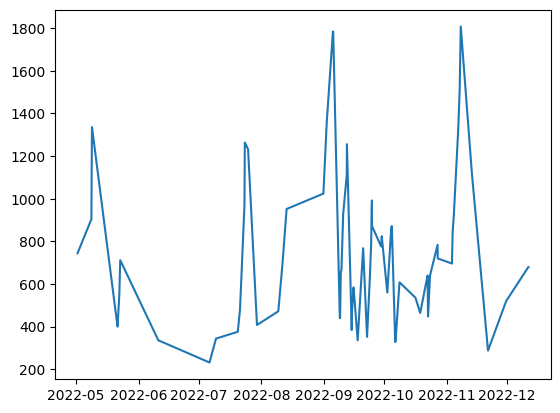

In [39]:
import numpy as np
from scipy.signal import find_peaks

# Replace these with your actual data points from the plot
x_data = df_group['Reading Date']
y_data = df_group['Reading']

# Use the find_peaks function to identify peak indices
peaks, _ = find_peaks(y_data, width=10)

# Print the x and y coordinates of the peaks
print("Peaks:")
sum = 0
for peak in peaks:
    print(f"x: {x_data[peak]}, y: {y_data[peak]}")
    sum+=1
plt.plot(x_data[peaks],y_data[peaks])
print(peaks)


In [42]:
# Merging dataframes to add Location and Address and Temperature
df1 = pd.read_csv('data/PSI_Readings_with_Weather_2023-01-04_1026.csv')
df2 = pd.read_csv('data/DeviceGeoLocations.csv')
df3 = pd.read_csv('data/BostonLogan.csv')
merged_df = df1.merge(df2, on='Serial No.')
merged_df = merged_df.drop('Account_y', axis=1)
merged_df = merged_df.drop('Site_y', axis=1)
merged_df = merged_df.drop('Device_y', axis=1)
merged_df['Date'] = pd.to_datetime(merged_df['Reading Date']).dt.date



merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')
df3['DATE'] = pd.to_datetime(df3['DATE'], format='%Y-%m-%d')

merged2_df = merged_df.merge(df3, left_on='Date', right_on='DATE', how='left')
merged2_df = merged2_df.drop(columns=['NAME','Date','STATION','Fahrenheit'])
merged2_df = merged2_df.rename(columns={'Account_x': 'Account','Site_x': 'Site','Device_x': 'Device','TAVG': 'Fahrenheit'})
merged2_df = merged2_df.reindex(columns=['Account',	'Site',	'Device', 'Device No.', 'Serial No.', 'Address', 'Latitude',	'Longitude', 'Reading',	'Reading Date', 'DATE',	'Pressure',	'Wind Speed',	'Celsius', 'Fahrenheit',	'TMAX',	'TMIN'])
merged2_df['Celsius'] = round(((merged2_df['Fahrenheit'] - 32) * 5/9), 0)
merged2_df.to_csv('data/PSI_Readings_with_Weather_Locations.csv')
merged2_df



,Account,Site,Device,Device No.,Serial No.,Address,Latitude,Longitude,Reading,Reading Date,DATE,Pressure,Wind Speed,Celsius,Fahrenheit,TMAX,TMIN
0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,39671,31180,"700 Commonwealth Avenue , Boston, MA, 02215, US",42.349396,-71.104056,168,2023-01-04T04:22:06,2023-01-04,1009.0,2.28,5.0,41,45,40
1,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,39671,31180,"700 Commonwealth Avenue , Boston, MA, 02215, US",42.349396,-71.104056,328,2023-01-04T04:21:53,2023-01-04,1009.0,2.28,5.0,41,45,40
2,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,39671,31180,"700 Commonwealth Avenue , Boston, MA, 02215, US",42.349396,-71.104056,208,2023-01-04T04:21:23,2023-01-04,1009.0,2.28,5.0,41,45,40
3,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,39671,31180,"700 Commonwealth Avenue , Boston, MA, 02215, US",42.349396,-71.104056,224,2023-01-03T18:57:48,2023-01-03,1015.2,2.47,5.0,41,45,34
4,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,39671,31180,"700 Commonwealth Avenue , Boston, MA, 02215, US",42.349396,-71.104056,336,2023-01-03T18:57:35,2023-01-03,1015.2,2.47,5.0,41,45,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,Boston University,BU #105 Kilachand Hall,BU #105 Kilachand Hall 20 Yd,39668,31177,"91 Bay State Rd , Boston, MA, 02215, US",42.350315,-71.097026,584,2022-05-01T15:47:58,2022-05-01,1018.6,5.19,11.0,52,61,45
99546,Boston University,BU #105 Kilachand Hall,BU #105 Kilachand Hall 20 Yd,39668,31177,"91 Bay State Rd , Boston, MA, 02215, US",42.350315,-71.097026,568,2022-05-01T15:46:23,2022-05-01,1018.6,5.19,11.0,52,61,45
99547,Boston University,BU #105 Kilachand Hall,BU #105 Kilachand Hall 20 Yd,39668,31177,"91 Bay State Rd , Boston, MA, 02215, US",42.350315,-71.097026,592,2022-05-01T15:45:18,2022-05-01,1018.6,5.19,11.0,52,61,45
99548,Boston University,BU #105 Kilachand Hall,BU #105 Kilachand Hall 20 Yd,39668,31177,"91 Bay State Rd , Boston, MA, 02215, US",42.350315,-71.097026,208,2022-05-01T15:44:07,2022-05-01,1018.6,5.19,11.0,52,61,45


In [55]:
# Trying to predict Reading values usin linear regression on whole data 


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your dataframe
df = pd.read_csv('data/PSI_Readings_with_Weather_Locations.csv')
# Drop the columns that are not needed for training the model
df['DATE'] = pd.to_datetime(df['DATE']).astype(int) // 10**9
df = df.drop(columns=['Account', 'Site', 'Device', 'Device No.', 'Serial No.', 'Address', 'Reading Date'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Reading'])
y = df['Reading']

# Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict 'Reading' values for the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 123636.99689716095
R2 Score: 0.09398221607237789


The Mean Squared Error (MSE) and R2 score you've obtained indicate that the Linear Regression model's performance is not very good. An R2 score close to 1 indicates a good model fit, while a score close to 0 (as in your case) suggests that the model isn't capturing the relationship between the features and the target variable ('Reading') well.

In [56]:
# Trying to predict Reading values usin linear regression on Warren Towers


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your dataframe
df = pd.read_csv('data/PSI_Readings_with_Weather_Locations.csv')
df = df.loc[df['Serial No.'] == 31180]

# Drop the columns that are not needed for training the model
df['DATE'] = pd.to_datetime(df['DATE']).astype(int) // 10**9
df = df.drop(columns=['Account', 'Site', 'Device', 'Device No.', 'Serial No.', 'Address', 'Reading Date'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Reading'])
y = df['Reading']

# Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict 'Reading' values for the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")



Mean Squared Error: 67377.73311807506
R2 Score: 0.055698641246183844


31180.0

Reslts even worse 

In [126]:
# Trying to predict Reading values usin linear regression


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your dataframe
df = pd.read_csv('data/PSI_Readings_with_Weather_Locations.csv')
unique = df['Serial No.'].unique()
site = []
for i in unique:
    site.append(df.loc[df['Serial No.'] == i, 'Site'].iloc[0])

for x in range(0,len(unique)):
    df_temp = df.loc[df['Serial No.'] == unique[x]]
    # location = df_temp['Site'][0]
    # Drop the columns that are not needed for training the model
    df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
    df_temp = df_temp.drop(columns=['Account', 'Site', 'Device', 'Device No.', 'Serial No.', 'Address', 'Reading Date'])

    # Split the data into features (X) and target (y)
    X = df_temp.drop(columns=['Reading'])
    y = df_temp['Reading']

    # Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict 'Reading' values for the test set
    y_pred = model.predict(X_test)

    # Calculate and print the Mean Squared Error and R2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Location: ', site[x])
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")



/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/25422264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/25422264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/25422264.py:20: SettingWithCopyWarning: 
A value is

Location:  BU #82 Warren Towers 35
Mean Squared Error: 67377.73311807506
R2 Score: 0.055698641246183844
Location:  BU 685 Comm Ave
Mean Squared Error: 100976.51604840238
R2 Score: 0.23320531038664583
Location:  BU #87 College of Engineering
Mean Squared Error: 78854.79259241027
R2 Score: 0.04733639796311584
Location:  BU #108 Agganis Arena
Mean Squared Error: 130728.7980810079
R2 Score: 0.12398408883443357
Location:  BU #102 Student Health Services
Mean Squared Error: 229846.24901056138
R2 Score: 0.3382820671080513
Location:  BU #90 - School of Law
Mean Squared Error: 88341.63063855782
R2 Score: 0.07195558290073856
Location:  BU #35 22 Babbit
Mean Squared Error: 95327.04736166331
R2 Score: 0.0641262927998133
Location:  BU #72 Rafik B Hariri
Mean Squared Error: 39883.945497252425
R2 Score: 0.043540856127409655
Location:  BU #48 Student Village #2
Mean Squared Error: 148228.0551914385
R2 Score: 0.05566983723720842
Location:  BU MED - 15 Stoughton
Mean Squared Error: 11507.897857474185
R2

/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/25422264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/25422264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/25422264.py:20: SettingWithCopyWarning: 
A value is

In [127]:
# Decission Trees

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your dataframe
df = pd.read_csv('data/PSI_Readings_with_Weather_Locations.csv')
unique = df['Serial No.'].unique()
site = []
for i in unique:
    site.append(df.loc[df['Serial No.'] == i, 'Site'].iloc[0])

for x in range(0, len(unique)):
    df_temp = df.loc[df['Serial No.'] == unique[x]]
    df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
    df_temp = df_temp.drop(columns=['Account', 'Site', 'Device', 'Device No.', 'Serial No.', 'Address', 'Reading Date'])

    # Split the data into features (X) and target (y)
    X = df_temp.drop(columns=['Reading'])
    y = df_temp['Reading']

    # Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Decision Tree Regressor model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict 'Reading' values for the test set
    y_pred = model.predict(X_test)

    # Calculate and print the Mean Squared Error and R2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Location: ', site[x])
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/4250251828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/4250251828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/4250251828.py:15: SettingWithCopyWarning: 
A va

Location:  BU #82 Warren Towers 35
Mean Squared Error: 69109.91941391942
R2 Score: 0.031421987861094514
Location:  BU 685 Comm Ave
Mean Squared Error: 86001.52763819095
R2 Score: 0.3469222620040642
Location:  BU #87 College of Engineering
Mean Squared Error: 3293.8372966207758
R2 Score: 0.9602063641237172
Location:  BU #108 Agganis Arena
Mean Squared Error: 26532.114977307112
R2 Score: 0.8222078438861444
Location:  BU #102 Student Health Services
Mean Squared Error: 172392.42105263157
R2 Score: 0.5036892836134815
Location:  BU #90 - School of Law
Mean Squared Error: 74976.99284009547
R2 Score: 0.21235346106717712
Location:  BU #35 22 Babbit
Mean Squared Error: 9284.537313432837
R2 Score: 0.908849014045354
Location:  BU #72 Rafik B Hariri
Mean Squared Error: 24249.774614472124
R2 Score: 0.4184647888344173
Location:  BU #48 Student Village #2
Mean Squared Error: 11504.500504540867
R2 Score: 0.9267072159860248
Location:  BU MED - 15 Stoughton
Mean Squared Error: 4812.639777468707
R2 Score

/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/4250251828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/4250251828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_87634/4250251828.py:15: SettingWithCopyWarning: 
A va

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your dataframe
df = pd.read_csv('data/PSI_Readings_with_Weather_Locations.csv')
unique = df['Serial No.'].unique()
site = []
for i in unique:
    site.append(df.loc[df['Serial No.'] == i, 'Site'].iloc[0])

for x in range(0, len(unique)):
    df_temp = df.loc[df['Serial No.'] == unique[x]]
    df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
    df_temp = df_temp.drop(columns=['Account', 'Site', 'Device', 'Device No.', 'Serial No.', 'Address', 'Reading Date'])

    # Split the data into features (X) and target (y)
    X = df_temp.drop(columns=['Reading'])
    y = df_temp['Reading']

    # Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train the Support Vector Regressor model
    model = SVR(kernel='linear')
    model.fit(X_train, y_train)

    # Predict 'Reading' values for the test set
    y_pred = model.predict(X_test)

    # Calculate and print the Mean Squared Error and R2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Location: ', site[x])
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU #82 Warren Towers 35
Mean Squared Error: 74100.13758515583
R2 Score: -0.038516099716274566
Location:  BU 685 Comm Ave
Mean Squared Error: 101193.17690718538
R2 Score: 0.23156003282644322


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU #87 College of Engineering
Mean Squared Error: 81045.0889649751
R2 Score: 0.02087490382665458
Location:  BU #108 Agganis Arena
Mean Squared Error: 137521.09572060034
R2 Score: 0.07846878621558595
Location:  BU #102 Student Health Services
Mean Squared Error: 330488.63085031754
R2 Score: 0.04853677363900044
Location:  BU #90 - School of Law
Mean Squared Error: 88639.8807315468
R2 Score: 0.06882241304981962


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value

Location:  BU #35 22 Babbit
Mean Squared Error: 99834.89699071912
R2 Score: 0.01987045921839803
Location:  BU #72 Rafik B Hariri
Mean Squared Error: 41236.20346085346
R2 Score: 0.011112281721453732


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU #48 Student Village #2
Mean Squared Error: 162215.43985355707
R2 Score: -0.03344088621892105
Location:  BU MED - 15 Stoughton
Mean Squared Error: 12187.36571979571
R2 Score: 0.08497250929880251


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU #38 Life Sciences
Mean Squared Error: 100754.91672454619
R2 Score: 0.01438662629556775
Location:  BU #96 808 Commonwealth
Mean Squared Error: 82645.24175299841
R2 Score: 0.019268146124174712


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU 140 Bay State Rd
Mean Squared Error: 141152.42840431095
R2 Score: -0.13935595536700007


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU #2 Student Village
Mean Squared Error: 139178.2755100701
R2 Score: -0.07917460436208823


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU #43 West Loading Dock
Mean Squared Error: 111131.64260589203
R2 Score: 0.030643288455330264


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU #93 George Sherman Union
Mean Squared Error: 92386.3356718558
R2 Score: -0.040663549943571464
Location:  BU #18 - Warren Hall
Mean Squared Error: 132025.62055514872
R2 Score: -0.019866964300181422


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9


Location:  BU Med 700
Mean Squared Error: 121976.87375114622
R2 Score: 0.0012000363660286117
Location:  BU Med #815 Albany
Mean Squared Error: 85832.64286758102
R2 Score: 0.11590335473993274
Location:  BU #69 - Graduate Apartments
Mean Squared Error: 89567.24220244763
R2 Score: 0.24317303128152057
Location:  BU #46 30 Bay State
Mean Squared Error: 164389.55221823906
R2 Score: 0.048337950363879334
Location:  BU Fenway
Mean Squared Error: 152265.65631256386
R2 Score: 0.018716969668620353


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value

Location:  BU #4 Yawkey
Mean Squared Error: 104087.38353013304
R2 Score: 0.08924739254674385
Location:  BU Fenway
Mean Squared Error: 130250.11918811908
R2 Score: -0.010290004640457706
Location:  BU #4 Yawkey
Mean Squared Error: 6172.494816672274
R2 Score: 0.09749959781126172
Location:  BU #93 George Sherman Union
Mean Squared Error: 6282.676336500555
R2 Score: 0.29847244899004977
Location:  BU #105 Kilachand Hall
Mean Squared Error: 324556.6802544055
R2 Score: 0.01764921426998911


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DATE'] = pd.to_datetime(df_temp['DATE']).astype(int) // 10**9
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_28965/290264569.py:16: SettingWithCopyWarning: 
A value